In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set1")
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df=pd.read_csv('/fds proj/ecommerce_sales_analysis.csv')


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
path_file = "/fds proj/ecommerce_sales_analysis.csv"
df = pd.read_csv(path_file)
df.head()


,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [5]:
#🧹📊 Data Cleaning and Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [7]:
#📈✨ Summary Statistics

In [8]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
product_id,1000.0,500.50000,288.819436,1.00,250.75,500.50,750.250,1000.00
price,1000.0,247.67713,144.607983,7.29,121.81,250.92,373.435,499.86
review_score,1000.0,3.02760,1.171243,1.00,2.00,3.10,4.000,5.00
review_count,1000.0,526.50600,282.269932,1.00,283.75,543.00,772.000,999.00
sales_month_1,1000.0,498.30600,289.941478,0.00,245.50,507.50,740.750,1000.00
sales_month_2,1000.0,507.66100,285.992689,2.00,262.50,508.00,756.250,1000.00
sales_month_3,1000.0,506.73900,294.010873,0.00,243.75,493.00,777.250,999.00
sales_month_4,1000.0,503.82300,286.645567,0.00,261.50,501.50,749.500,1000.00
sales_month_5,1000.0,487.19400,287.844324,0.00,221.00,497.00,727.000,1000.00
sales_month_6,1000.0,491.65300,289.234018,0.00,236.00,479.50,740.500,1000.00


In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n",missing_values)

Missing values in each column:
 product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64


In [10]:
df["category"].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [11]:
df["category"].mode()


0    Books
Name: category, dtype: object

In [12]:
df["price"].mode(all)

0     47.25
1     97.35
2    159.30
3    248.85
4    318.53
5    362.52
6    400.71
7    485.11
Name: price, dtype: float64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)

# Identify the product with the highest sales
max_sales_product = df.loc[df['total_sales'].idxmax()]
max_sales_product_name = max_sales_product['product_name']
max_sales_amount = max_sales_product['total_sales']

# Identify the product with the lowest sales
min_sales_product = df.loc[df['total_sales'].idxmin()]
min_sales_product_name = min_sales_product['product_name']
min_sales_amount = min_sales_product['total_sales']

# Display the results
print(f"Product with the highest sales: {max_sales_product_name} with {max_sales_amount} units sold.")
print(f"Product with the lowest sales: {min_sales_product_name} with {min_sales_amount} units sold.")

Product with the highest sales: Product_224 with 9151 units sold.
Product with the lowest sales: Product_123 with 2972 units sold.


<Axes: >

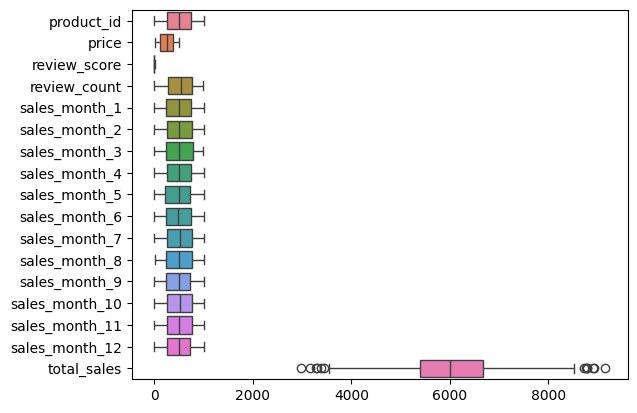

In [15]:
sns.boxplot(df,orient='h')

In [16]:
#📊🌟 Distribution of Numerical Features

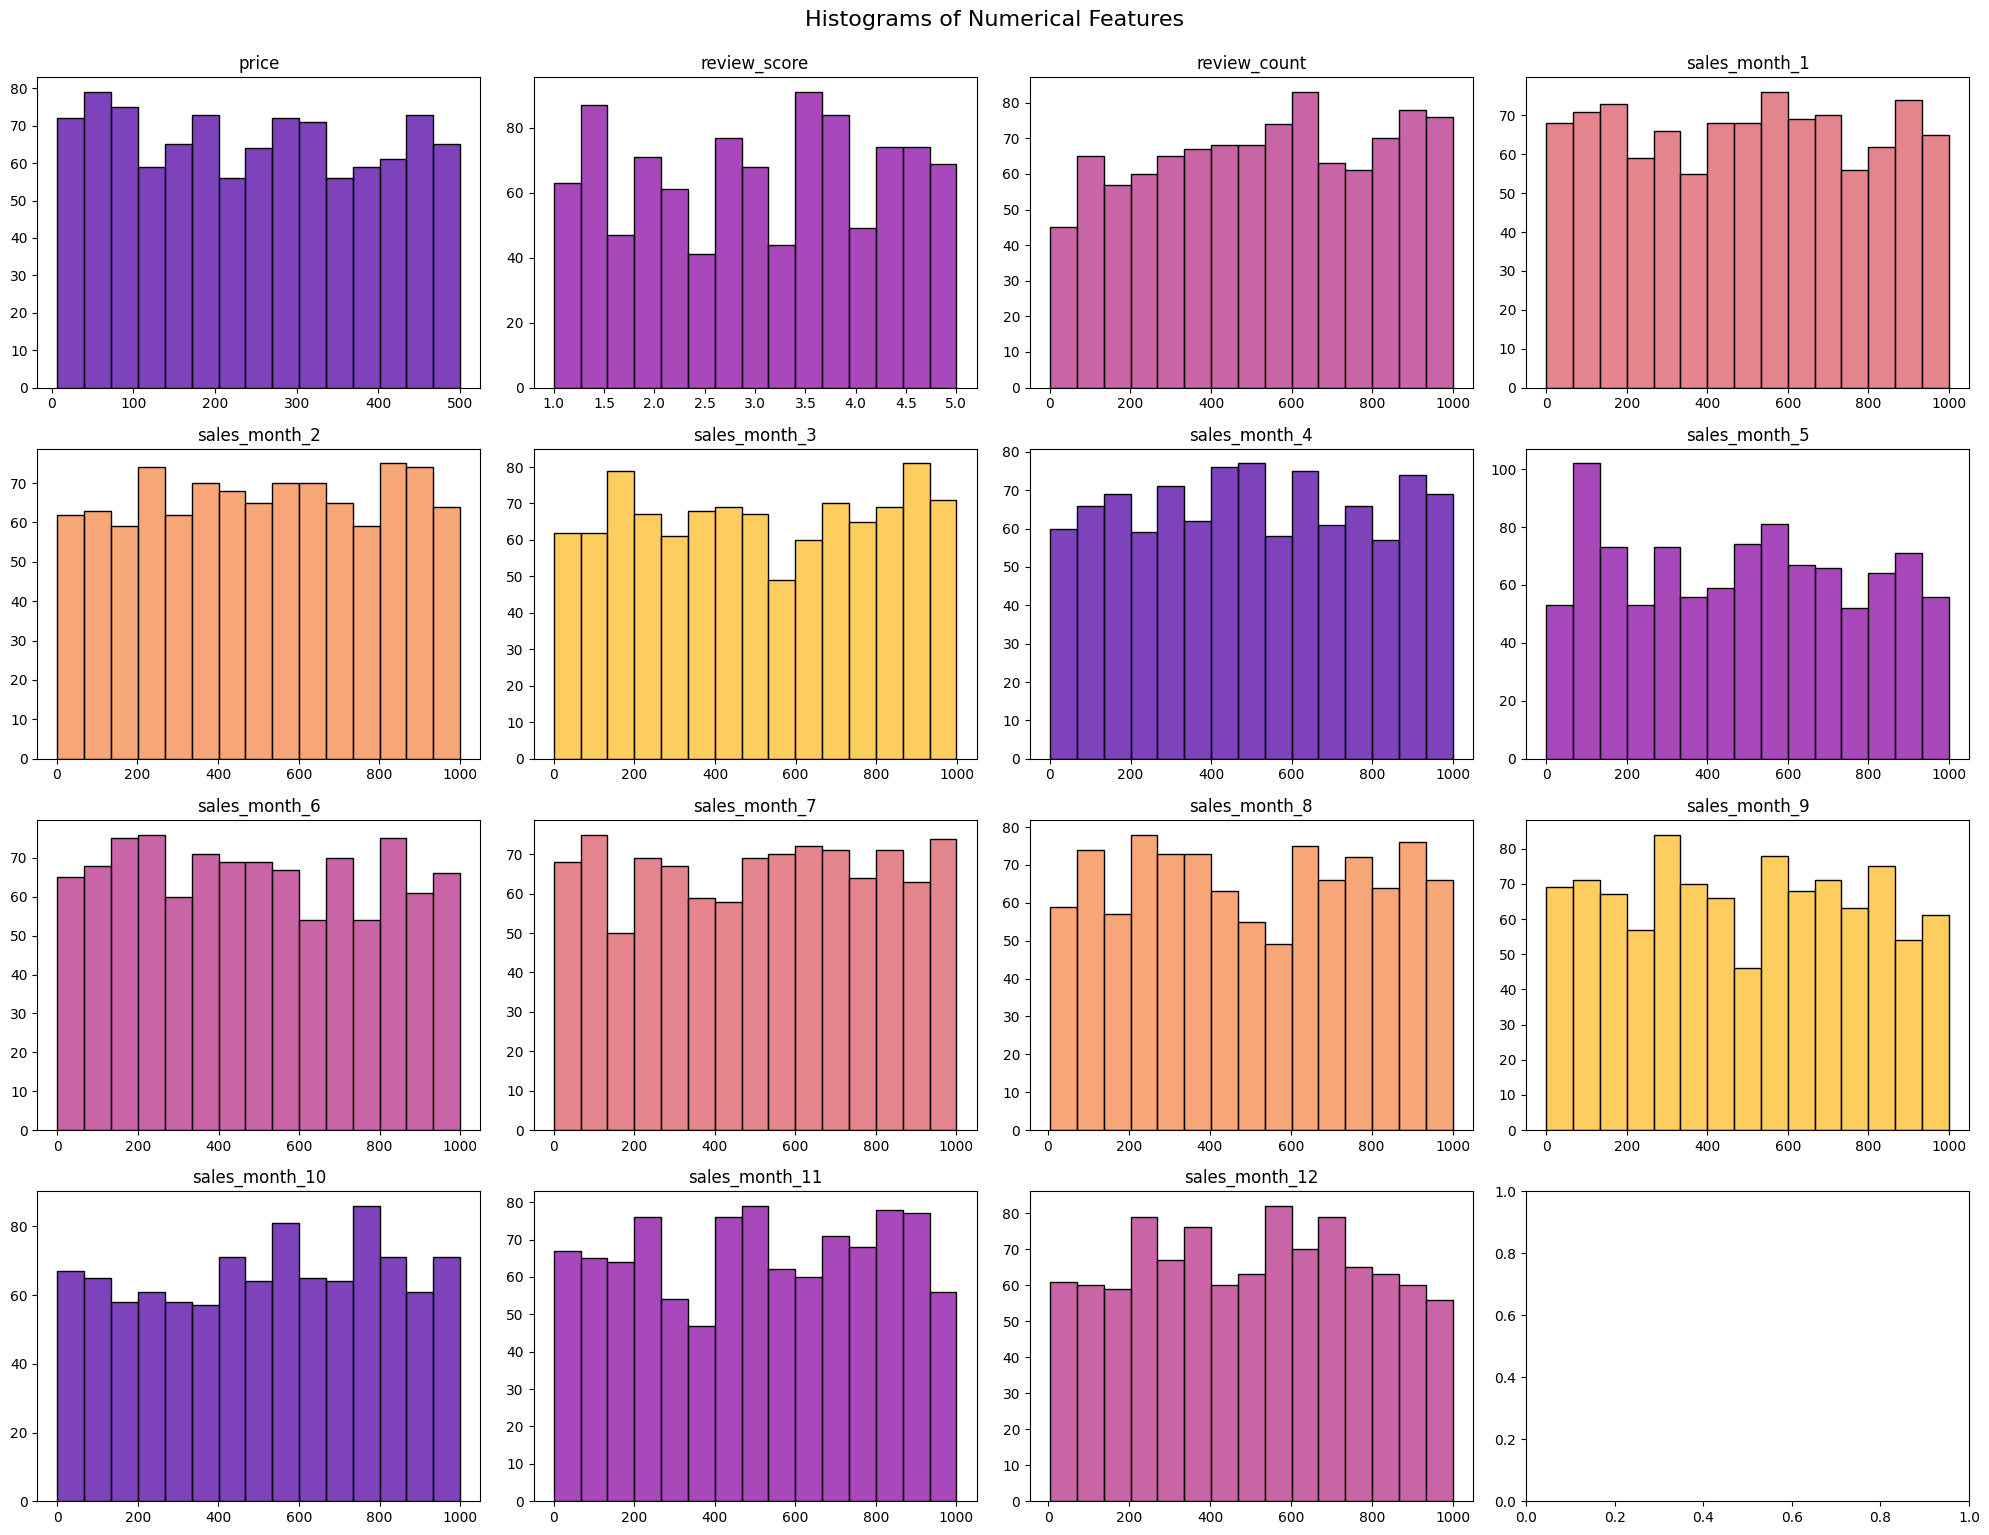

In [17]:
# List of numerical features
numerical_features = ['price', 'review_score', 'review_count'] + [f'sales_month_{i}' for i in range(1, 13)]

# Set a beautiful color palette using Seaborn
sns.set_palette("plasma")

# Plotting histograms
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=15, kde=False, ax=axes[i], color=sns.color_palette("plasma")[i % len(sns.color_palette("plasma"))])
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()

In [18]:
#🎨📊 Data Visualizations

In [19]:
# Import Plotly Express
import plotly.express as px
import pandas as pd

# Define the 'category_sales' DataFrame (example data)
data = {
    'category': ['Electronics', 'Clothing', 'Books', 'Home & Kitchen', 'Toys'],
    'total_sales': [15000, 12000, 8000, 10000, 5000]
}
category_sales = pd.DataFrame(data)

# Sort the 'category_sales' DataFrame by 'total_sales'
category_sales = category_sales.sort_values(by='total_sales', ascending=False)

# Create a bar plot for top-performing product categories with a beautiful color palette
fig = px.bar(
    category_sales, 
    x='category', 
    y='total_sales',
    title='Top-Performing Product Categories',
    labels={'category': 'Product Category', 'total_sales': 'Total Sales'},
    color='total_sales', 
    color_continuous_scale=px.colors.sequential.Viridis  # Upgraded color palette
)

fig.update_layout(
    title_font_size=24,
    xaxis_title="Product Category",
    yaxis_title="Total Sales",
    xaxis_tickangle=-45,  # Tilt x-axis labels for better readability
    plot_bgcolor='white',  # Clean background
    height=600  # Increase plot height
)

fig.update_traces(
    text=category_sales['total_sales'],
    textposition='outside',
    marker=dict(line=dict(width=2, color='black'))
)

# Show the plot
fig.show()

In [20]:
# Calculate average review score and total review count per category
category_reviews = df.groupby('category').agg({
    'review_score': 'mean',
    'review_count': 'sum'
}).sort_values(by='review_score', ascending=False).reset_index()

# Plotting Average Review Score by Category with Plotly
fig = px.bar(category_reviews, x='category', y='review_score',
             title='Average Review Score by Category',
             color='review_score', color_continuous_scale='Viridis')  # Beautiful color palette

fig.update_layout(
    title_font_size=24,
    xaxis_title="Category",
    yaxis_title="Average Review Score",
    template="plotly_white",  # Light background
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=120, t=100, pad=4),  # Adjust margins
    width=1000,  # Width of the plot
    height=500   # Decreased plot height
)

fig.update_traces(text=category_reviews['review_score'].round(2),
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black')))

fig.show()
# Plotting Total Review Count by Category with Plotly
fig = px.bar(category_reviews, x='category', y='review_count',
             title='Total Review Count by Category',
             color='review_count', color_continuous_scale='Viridis')  # Beautiful color palette

fig.update_layout(
    title_font_size=24,
    xaxis_title="Category",
    yaxis_title="Total Review Count",
    template="plotly_white",  # Light background
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=120, t=100, pad=4),  # Adjust margins
    width=1000,  # Width of the plot
    height=500   # Decreased plot height
)

fig.update_traces(text=category_reviews['review_count'],
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black')))

fig.show()

In [21]:
# Calculate average review score and total review count per category
category_reviews = df.groupby('category').agg({
    'review_score': 'mean',
    'review_count': 'sum'
}).sort_values(by='review_score', ascending=False).reset_index()

# Plotting Average Review Score by Category with Plotly
fig = px.bar(category_reviews, x='category', y='review_score',
             title='Average Review Score by Category',
             color='review_score', color_continuous_scale='Blues',  # Beautiful color palette
             text='review_score')  # Adding text labels

fig.update_layout(
    title_font_size=24,  # Larger title font size
    xaxis_title="Category",
    yaxis_title="Average Review Score",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template="plotly_white",  # Light background theme
    plot_bgcolor='rgba(255,255,255,0.9)',  # Slightly off-white plot background
    paper_bgcolor='rgba(245,245,245,1)',  # Light gray paper background
    xaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=140, t=120, pad=4),  # Adjust margins
    width=1000,  # Width of the plot
    height=500   # Height of the plot
)
fig.update_traces(texttemplate='%{text:.2f}', textfont_size=14, textposition='outside')  # Format text labels

fig.show()

# Plotting Total Review Count by Category with Plotly
fig = px.bar(category_reviews, x='category', y='review_count',
             title='Total Review Count by Category',
             color='review_count', color_continuous_scale='Blues',  # Beautiful color palette
             text='review_count')  # Adding text labels

fig.update_layout(
    title_font_size=24,  # Larger title font size
    xaxis_title="Category",
    yaxis_title="Total Review Count",
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template="plotly_white",  # Light background theme
    plot_bgcolor='rgba(255,255,255,0.9)',  # Slightly off-white plot background
    paper_bgcolor='rgba(245,245,245,1)',  # Light gray paper background
    xaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=140, t=120, pad=4),  # Adjust margins
    width=1000,  # Width of the plot
    height=500   # Height of the plot
)
fig.update_traces(texttemplate='%{text:.0f}', textfont_size=14, textposition='outside')  # Format text labels

fig.show()

In [22]:
fig = px.scatter(df, x='price', y='total_sales', color='category', title='Price vs. Total Sales',
                 color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=20,
    xaxis_title="Price",
    yaxis_title="Total Sales",
    template="plotly_dark"
)

fig.show()

# Scatter plot: price vs. review_score with Viridis color palette
fig = px.scatter(df, x='price', y='review_score', color='category', title='Price vs. Review Score',
                 color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=20,
    xaxis_title="Price",
    yaxis_title="Review Score",
    template="plotly_dark"
)

fig.show()

In [23]:
monthly_sales = df.loc[:, 'sales_month_1':'sales_month_12'].sum().reset_index()
monthly_sales.columns = ['month', 'total_sales']
monthly_sales['month'] = monthly_sales['month'].apply(lambda x: x.split('_')[-1]).astype(int)

# Create the line plot with the Plotly color palette
fig = px.line(monthly_sales, x='month', y='total_sales', title='Monthly Sales Trends',
              markers=True, line_shape='spline', color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    title_font_size=20,
    xaxis_title="Month",
    yaxis_title="Total Sales",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()


In [24]:
# Define summer and winter months
summer_sales = df.loc[:, 'sales_month_6':'sales_month_8'].sum(axis=1)
winter_sales = df.loc[:, 'sales_month_12':'sales_month_2'].sum(axis=1)

# Add summer and winter sales to DataFrame
df['summer_sales'] = summer_sales
df['winter_sales'] = winter_sales

# Create a bubble plot for summer vs. winter sales with an upgraded color palette
fig = px.scatter(df, x='summer_sales', y='winter_sales', size='price',
                 color='category', hover_name='product_name',
                 title='Summer vs. Winter Sales',
                 labels={'summer_sales': 'Summer Sales', 'winter_sales': 'Winter Sales'},
                 color_discrete_sequence=px.colors.qualitative.Pastel,  # Beautiful pastel color palette
                 size_max=60)

fig.update_layout(
    title_font_size=24,
    xaxis_title="Summer Sales",
    yaxis_title="Winter Sales",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    yaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    font=dict(family="Arial", size=16, color="white"),
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)
fig.update_traces(marker=dict(line=dict(width=2, color='black')))

fig.show()

# Find the products with the highest sales in both seasons
highest_summer_winter_sales_product = df[
    (df['summer_sales'] == df['summer_sales'].max()) & 
    (df['winter_sales'] == df['winter_sales'].max())
]

highest_summer_winter_sales_product[['product_name', 'summer_sales', 'winter_sales']]

,product_name,summer_sales,winter_sales
557,Product_558,2900,0.0


In [25]:
# Define the number of top products to display
top_n = 10

# Sort products by price in descending order and select the top N products
top_high_price_products = df.sort_values(by='price', ascending=False).head(top_n)

# Create a bar plot for the top high-priced products with a beautiful color scale
fig = px.bar(top_high_price_products, x='product_name', y='price',
             title=f'Top {top_n} High-Priced Products',
             labels={'product_name': 'Product Name', 'price': 'Price'},
             color='price', color_continuous_scale=px.colors.sequential.Rainbow)

# Add labels to each bar
fig.update_traces(text=top_high_price_products['price'],
                  textposition='outside',
                  marker=dict(line=dict(width=2, color='black'), opacity=0.9))

fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=26,
    xaxis_title="Product Name",
    yaxis_title="Price",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Arial", size=15, color="white"),
    title=dict(x=0.5, font=dict(size=30, color='#FFD700')),  # Gold color for the title
    xaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    yaxis=dict(showgrid=False, linecolor='white', linewidth=2),
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='rgba(0,0,0,0)',
)
fig.update_traces(texttemplate='%{text:.2s}', textfont_size=15)  # Format text labels

fig.show()